In [1]:
!nvidia-smi

Wed Oct  6 17:19:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.68       Driver Version: 471.68       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 N/A |                  N/A |
| 23%    0C    P8    N/A /  N/A |     40MiB /  2048MiB |     N/A      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

NameError: name 'os' is not defined

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 367289171762719248
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1465348916
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14753405662438523272
physical_device_desc: "device: 0, name: NVIDIA GeForce GT 730, pci bus id: 0000:01:00.0, compute capability: 3.5"
]


In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [11]:

X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
cnn=models.Sequential([layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
                      layers.MaxPooling2D((2,2)),
                       
                      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                      layers.MaxPooling2D((2,2)),
                       
                       layers.Flatten(),
                       layers.Dense(64, activation='relu'),
                       layers.Dense(10, activation='softmax')
                      ])

In [10]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
cnn.fit(X_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 132s 11ms/step - loss: 2.4167 - accuracy: 0.2466
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5141 - accuracy: 0.4525
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2826 - accuracy: 0.5436
Epoch 4/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1333 - accuracy: 0.6062
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0529 - accuracy: 0.6354


In [12]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2278 - accuracy: 0.5876


[1.2278310060501099, 0.5875999927520752]

In [13]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.49689538e-02, 1.65961089e-03, 2.11941339e-02, 5.80609560e-01,
        4.84491605e-03, 3.23842615e-01, 1.41588999e-02, 1.94519721e-02,
        5.16523747e-03, 4.10411507e-03],
       [2.91303813e-01, 1.19256943e-01, 1.69150042e-03, 8.53768506e-05,
        5.50249068e-04, 5.46078991e-05, 2.75943185e-05, 7.31568362e-05,
        5.44591129e-01, 4.23656404e-02],
       [2.20694110e-01, 2.90017873e-01, 5.77314645e-02, 1.32295685e-02,
        1.26506779e-02, 2.02834606e-02, 6.28035702e-03, 1.65911391e-02,
        2.57244289e-01, 1.05277076e-01],
       [2.68752277e-01, 8.17219168e-03, 2.60524992e-02, 1.06371206e-03,
        5.82671119e-03, 2.36062013e-04, 2.10772821e-04, 2.18014146e-04,
        6.87619448e-01, 1.84830278e-03],
       [2.06680619e-03, 1.51578232e-03, 2.44277820e-01, 1.29957259e-01,
        4.25695062e-01, 2.34244503e-02, 1.69427350e-01, 2.64612865e-03,
        3.88754182e-04, 6.00574422e-04]], dtype=float32)

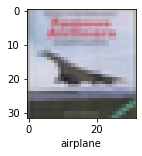

In [14]:
plot_sample(X_test, y_test,3)

In [33]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.78      0.69      1000
           1       0.82      0.75      0.79      1000
           2       0.69      0.42      0.52      1000
           3       0.50      0.45      0.47      1000
           4       0.55      0.71      0.62      1000
           5       0.60      0.55      0.57      1000
           6       0.87      0.60      0.71      1000
           7       0.67      0.78      0.72      1000
           8       0.65      0.84      0.73      1000
           9       0.76      0.73      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

